In [ ]:
import pandas as pd
import numpy as np

dfs = []
for i in range(2017,2022):
    year_df = pd.read_csv(f"{i}_lake_data.csv")
    year_df.insert(1,"Year",i)
    dfs.append(year_df)

df = pd.concat(dfs)
df

,STN Code,Year,Name of Monitoring Location,Type Water Body,State Name,Min Temperature,Max Temperature,Min Dissolved Oxygen,Max Dissolved Oxygen,Min pH,...,Min Conductivity,Max Conductivity,Min BOD,Max BOD,Min Nitrate N + Nitrite N,Max Nitrate N + Nitrite N,Min Fecal Coliform,Max Fecal Coliform,Min Total Coliform,Max Total Coliform
0,1790.0,2017,"PULICATE LAKE , NELLORE \nDIST.",LAKE,ANDHRA \nPRADESH,27.0,28.0,5.1,6.9,7.1,...,3270.0,156600.0,1.0,2.3,0.65,6.9,2.0,2.0,800.0,1600.0
1,2353.0,2017,"KONDACHARLA-AAVA LAKE, \nPARAWADA PHARMA CITY,...",LAKE,ANDHRA \nPRADESH,24.0,28.0,5.9,6.8,6.9,...,597.0,1034.0,1.3,2.3,1.16,3.36,11.0,29.0,350.0,2400.0
2,2205.0,2017,"MER BEEL AT MADHABPUR, \nASSAM",LAKE,ASSAM,20.0,27.0,2.2,7.2,5.7,...,50.0,128.0,1.0,16.2,0.1,1.7,300.0,2000.0,360.0,6400.0
3,2206.0,2017,"DALONI BEEL NEAR \nJOGIGHOPA, ASSAM",LAKE,ASSAM,22.0,36.0,5.1,6.0,6.6,...,54.0,153.0,0.9,2.8,0.1,1.4,300.0,1200.0,300.0,5300.0
4,1263.0,2017,ELANGABEEL SYSTEM POND \n(CONNECTED TO R. KOLA...,POND,ASSAM,22.0,34.0,0.7,4.6,6.8,...,263.0,972.0,4.5,14.7,0.8,5.7,1100.0,3500.0,730.0,21000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
615,1765.0,2021,"RABINDRASAROVAR NATIONAL LAKE, \nCALCUTTA, WES...",LAKE,WEST BENGAL,22.0,31.0,5.2,9.7,7.2,...,252,826,1.8,4.1,0.30,1.90,330,790,1100,1700
616,2544.0,2021,SAHEBBANDH AT PURULIA,LAKE,WEST BENGAL,22.0,32.0,8.8,9.8,7.0,...,311,422,2.7,7.3,0.30,0.80,3100,9400,4300,12000
617,2522.0,2021,SINCHAL LAKE FOR DARJEELING,LAKE,WEST BENGAL,7.0,16.0,7.1,8.1,6.9,...,13,29,1.0,1.1,0.30,0.30,70,110,110,210
618,2521.0,2021,"WATER RESERVIOR AT DELO LAKE, \nDARJELLING",LAKE,WEST BENGAL,9.0,24.0,7.2,8.2,6.9,...,20,36,1.0,1.8,0.30,0.30,60,130,110,330


In [ ]:
#using only data of lakes
df = df[df["Type Water Body"]=="LAKE"]

#drop rows containing blank values
df = df.dropna()

#some entries in the pdf have - to represent a blank value so we must remove those as well
bad_vals = df.apply(lambda x:x=="-").any(axis=1)
bad_idx = bad_vals.index[bad_vals]
df = df.drop(bad_idx)

#replace below detection level with 0
df = df.replace("BDL",0)

df.reset_index(inplace=True,drop=True)
df

,STN Code,Year,Name of Monitoring Location,Type Water Body,State Name,Min Temperature,Max Temperature,Min Dissolved Oxygen,Max Dissolved Oxygen,Min pH,...,Min Conductivity,Max Conductivity,Min BOD,Max BOD,Min Nitrate N + Nitrite N,Max Nitrate N + Nitrite N,Min Fecal Coliform,Max Fecal Coliform,Min Total Coliform,Max Total Coliform
0,1790.0,2017,"PULICATE LAKE , NELLORE \nDIST.",LAKE,ANDHRA \nPRADESH,27.0,28.0,5.1,6.9,7.1,...,3270.0,156600.0,1.0,2.3,0.65,6.9,2.0,2.0,800.0,1600.0
1,2353.0,2017,"KONDACHARLA-AAVA LAKE, \nPARAWADA PHARMA CITY,...",LAKE,ANDHRA \nPRADESH,24.0,28.0,5.9,6.8,6.9,...,597.0,1034.0,1.3,2.3,1.16,3.36,11.0,29.0,350.0,2400.0
2,2205.0,2017,"MER BEEL AT MADHABPUR, \nASSAM",LAKE,ASSAM,20.0,27.0,2.2,7.2,5.7,...,50.0,128.0,1.0,16.2,0.1,1.7,300.0,2000.0,360.0,6400.0
3,2206.0,2017,"DALONI BEEL NEAR \nJOGIGHOPA, ASSAM",LAKE,ASSAM,22.0,36.0,5.1,6.0,6.6,...,54.0,153.0,0.9,2.8,0.1,1.4,300.0,1200.0,300.0,5300.0
4,2557.0,2017,"KAWAR LAKE, BEGUSARAI, \nBIHAR",LAKE,BIHAR,19.0,32.0,5.4,8.0,7.2,...,222.0,325.0,2.1,2.8,0.0,0.0,7000.0,26000.0,15000.0,38000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1088,1765.0,2021,"RABINDRASAROVAR NATIONAL LAKE, \nCALCUTTA, WES...",LAKE,WEST BENGAL,22.0,31.0,5.2,9.7,7.2,...,252,826,1.8,4.1,0.30,1.90,330,790,1100,1700
1089,2544.0,2021,SAHEBBANDH AT PURULIA,LAKE,WEST BENGAL,22.0,32.0,8.8,9.8,7.0,...,311,422,2.7,7.3,0.30,0.80,3100,9400,4300,12000
1090,2522.0,2021,SINCHAL LAKE FOR DARJEELING,LAKE,WEST BENGAL,7.0,16.0,7.1,8.1,6.9,...,13,29,1.0,1.1,0.30,0.30,70,110,110,210
1091,2521.0,2021,"WATER RESERVIOR AT DELO LAKE, \nDARJELLING",LAKE,WEST BENGAL,9.0,24.0,7.2,8.2,6.9,...,20,36,1.0,1.8,0.30,0.30,60,130,110,330


In [ ]:
#Required Columns
L = [
  "Min Temperature","Max Temperature","Min Dissolved Oxygen","Max Dissolved Oxygen",
  "Min pH","Max pH","Min Conductivity","Max Conductivity","Min BOD","Max BOD",
  "Min Nitrate N + Nitrite N","Max Nitrate N + Nitrite N","Min Fecal Coliform",
  "Max Fecal Coliform","Min Total Coliform","Max Total Coliform"
]
df[L] = df[L].apply(pd.to_numeric)

#dropping redundant columns
df = df.drop(columns=["Name of Monitoring Location","Type Water Body"])
df = df.astype({"STN Code":int})
df

,STN Code,Year,State Name,Min Temperature,Max Temperature,Min Dissolved Oxygen,Max Dissolved Oxygen,Min pH,Max pH,Min Conductivity,Max Conductivity,Min BOD,Max BOD,Min Nitrate N + Nitrite N,Max Nitrate N + Nitrite N,Min Fecal Coliform,Max Fecal Coliform,Min Total Coliform,Max Total Coliform
0,1790,2017,ANDHRA \nPRADESH,27.0,28.0,5.1,6.9,7.1,8.5,3270.0,156600.0,1.0,2.3,0.65,6.90,2.0,2.0,800.0,1600.0
1,2353,2017,ANDHRA \nPRADESH,24.0,28.0,5.9,6.8,6.9,8.4,597.0,1034.0,1.3,2.3,1.16,3.36,11.0,29.0,350.0,2400.0
2,2205,2017,ASSAM,20.0,27.0,2.2,7.2,5.7,7.0,50.0,128.0,1.0,16.2,0.10,1.70,300.0,2000.0,360.0,6400.0
3,2206,2017,ASSAM,22.0,36.0,5.1,6.0,6.6,7.8,54.0,153.0,0.9,2.8,0.10,1.40,300.0,1200.0,300.0,5300.0
4,2557,2017,BIHAR,19.0,32.0,5.4,8.0,7.2,7.9,222.0,325.0,2.1,2.8,0.00,0.00,7000.0,26000.0,15000.0,38000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1088,1765,2021,WEST BENGAL,22.0,31.0,5.2,9.7,7.2,8.5,252.0,826.0,1.8,4.1,0.30,1.90,330.0,790.0,1100.0,1700.0
1089,2544,2021,WEST BENGAL,22.0,32.0,8.8,9.8,7.0,7.6,311.0,422.0,2.7,7.3,0.30,0.80,3100.0,9400.0,4300.0,12000.0
1090,2522,2021,WEST BENGAL,7.0,16.0,7.1,8.1,6.9,7.6,13.0,29.0,1.0,1.1,0.30,0.30,70.0,110.0,110.0,210.0
1091,2521,2021,WEST BENGAL,9.0,24.0,7.2,8.2,6.9,7.6,20.0,36.0,1.0,1.8,0.30,0.30,60.0,130.0,110.0,330.0


In [ ]:
df.dtypes


,0
STN Code,int64
Year,int64
State Name,object
Min Temperature,float64
Max Temperature,float64
Min Dissolved Oxygen,float64
Max Dissolved Oxygen,float64
Min pH,float64
Max pH,float64
Min Conductivity,float64


### **Calculating WQI**

To calculate water quality index, we can use the Weighted Arithmetic Mean method

<math xmlns="http://www.w3.org/1998/Math/MathML" display="block">
  <mi>W</mi>
  <mi>Q</mi>
  <mi>I</mi>
  <mo>=</mo>
  <mfrac>
    <mrow>
      <mo data-mjx-texclass="OP">&#x2211;</mo>
      <msub>
        <mi>q</mi>
        <mi>i</mi>
      </msub>
      <msub>
        <mi>w</mi>
        <mi>i</mi>
      </msub>
    </mrow>
    <mrow>
      <mo data-mjx-texclass="OP">&#x2211;</mo>
      <msub>
        <mi>w</mi>
        <mi>i</mi>
      </msub>
    </mrow>
  </mfrac>
</math>




In [ ]:
stv = np.array([5,8.5,2250,3,45,200,1000])
K = 1/np.sum(stv)
w = [K/x for x in stv]
w_n = np.array([x/sum(w) for x in w])
print(w_n)

[0.29427038 0.17310023 0.00065393 0.49045064 0.03269671 0.00735676
 0.00147135]


In [ ]:
idv = np.array([14.6,7,0,0,0,0,0])
diff = stv-idv

def calculate_wqi(row):
    q = 100*(row - idv)/diff
    return np.dot(q,w_n)

example_row = np.array([6.8,7.8,1179,4.6,3.56,23,240])
calculate_wqi(example_row)

108.75676031175138

In [ ]:
def avg(col1,col2):
    return (col1.to_numpy() + col2.to_numpy())/2

pd.set_option('mode.chained_assignment',None)

df_a = pd.DataFrame()
df_a["Dissolved Oxygen"] = avg(df["Min Dissolved Oxygen"],df["Max Dissolved Oxygen"])
df_a["pH"] = avg(df["Min pH"],df["Max pH"])
df_a["Conductivity"] = avg(df["Min Conductivity"],df["Max Conductivity"])
df_a["BOD"] = avg(df["Min BOD"],df["Max BOD"])
df_a["Nitrate N + Nitrite N"] = avg(df["Min Nitrate N + Nitrite N"],df["Max Nitrate N + Nitrite N"])
df_a["Fecal Coliform"] = avg(df["Min Fecal Coliform"],df["Max Fecal Coliform"])
df_a["Total Coliform"] = avg(df["Min Total Coliform"],df["Max Total Coliform"])
df_a.rename(columns={
    'Dissolved Oxygen':'DO',
    'Conductivity':'EC',
    'Nitrate N + Nitrite N':'NN',
    'Fecal Coliform':'FC',
    'Total Coliform':'TC'
},inplace=True)
df_a

,DO,pH,EC,BOD,NN,FC,TC
0,6.00,7.80,79935.0,1.65,3.775,2.0,1200.0
1,6.35,7.65,815.5,1.80,2.260,20.0,1375.0
2,4.70,6.35,89.0,8.60,0.900,1150.0,3380.0
3,5.55,7.20,103.5,1.85,0.750,750.0,2800.0
4,6.70,7.55,273.5,2.45,0.000,16500.0,26500.0
...,...,...,...,...,...,...,...
1088,7.45,7.85,539.0,2.95,1.100,560.0,1400.0
1089,9.30,7.30,366.5,5.00,0.550,6250.0,8150.0
1090,7.60,7.25,21.0,1.05,0.300,90.0,160.0
1091,7.70,7.25,28.0,1.40,0.300,95.0,220.0


In [ ]:
wqi = df_a.apply(calculate_wqi,axis=1)
df_a["WQI"] = wqi
df_a = df_a[df_a["WQI"]>=0]
df_a.dropna()
df_a.insert(0,"STN Code",df["STN Code"])
df_a.insert(1,"Year",df["Year"])
df_a

,STN Code,Year,DO,pH,EC,BOD,NN,FC,TC,WQI
0,1790,2017,6.00,7.80,79935.0,1.65,3.775,2.0,1200.0,65.349937
1,2353,2017,6.35,7.65,815.5,1.80,2.260,20.0,1375.0,62.680699
2,2205,2017,4.70,6.35,89.0,8.60,0.900,1150.0,3380.0,168.236907
3,2206,2017,5.55,7.20,103.5,1.85,0.750,750.0,2800.0,63.521839
4,2557,2017,6.70,7.55,273.5,2.45,0.000,16500.0,26500.0,135.216775
...,...,...,...,...,...,...,...,...,...,...
1088,1765,2021,7.45,7.85,539.0,2.95,1.100,560.0,1400.0,82.315144
1089,2544,2021,9.30,7.30,366.5,5.00,0.550,6250.0,8150.0,125.689595
1090,2522,2021,7.60,7.25,21.0,1.05,0.300,90.0,160.0,41.884995
1091,2521,2021,7.70,7.25,28.0,1.40,0.300,95.0,220.0,47.327811


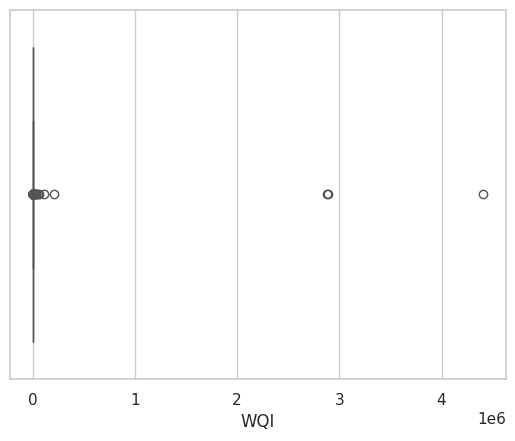

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib_inline
import seaborn as sns

# seaborn theme defaults
matplotlib_inline.backend_inline.set_matplotlib_formats('png')
sns.set_theme()
sns.set_style("whitegrid")
sns.set_palette("muted")

def boxplot(feature):
    sns.boxplot(data=df_a,x=feature,orient='h')

boxplot("WQI")

In [ ]:
from statsmodels.stats.stattools import medcouple

MC = float(medcouple(df_a["WQI"]))
q1,q3 = np.percentile(df_a["WQI"],[25,75],method='lower')
iqr = q3 - q1
print(f"{MC = }")
print(f"{q1 = }")
print(f"{q3 = }")
print(f"{iqr = }")

MC = 0.7051828302648432
q1 = 65.26663065754579
q3 = 297.0524219072226
iqr = 231.7857912496768


In [ ]:
upper_fence = q3 + (1.5*iqr*np.exp(3*MC))
print(upper_fence)

3180.745961476936


In [ ]:
df_a = df_a[df_a["WQI"]<upper_fence]
df_a

,STN Code,Year,DO,pH,EC,BOD,NN,FC,TC,WQI
0,1790,2017,6.00,7.80,79935.0,1.65,3.775,2.0,1200.0,65.349937
1,2353,2017,6.35,7.65,815.5,1.80,2.260,20.0,1375.0,62.680699
2,2205,2017,4.70,6.35,89.0,8.60,0.900,1150.0,3380.0,168.236907
3,2206,2017,5.55,7.20,103.5,1.85,0.750,750.0,2800.0,63.521839
4,2557,2017,6.70,7.55,273.5,2.45,0.000,16500.0,26500.0,135.216775
...,...,...,...,...,...,...,...,...,...,...
1088,1765,2021,7.45,7.85,539.0,2.95,1.100,560.0,1400.0,82.315144
1089,2544,2021,9.30,7.30,366.5,5.00,0.550,6250.0,8150.0,125.689595
1090,2522,2021,7.60,7.25,21.0,1.05,0.300,90.0,160.0,41.884995
1091,2521,2021,7.70,7.25,28.0,1.40,0.300,95.0,220.0,47.327811


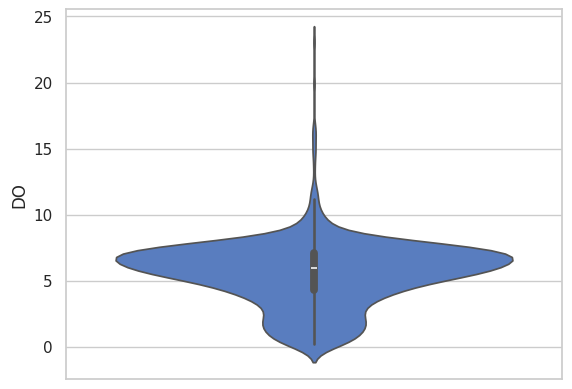

In [ ]:
def violinplot(feature):
    sns.violinplot(data=df_a,y=feature,orient='v')

violinplot("DO")

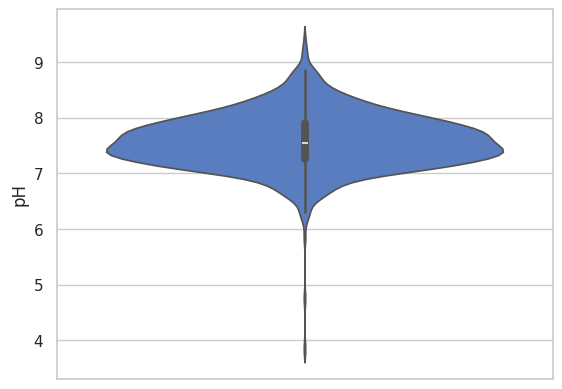

In [ ]:
violinplot("pH")


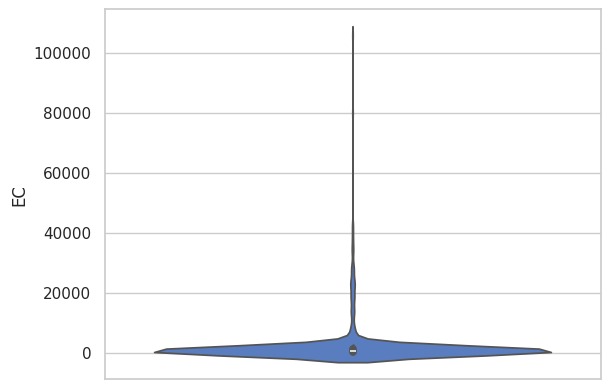

In [ ]:
violinplot("EC")


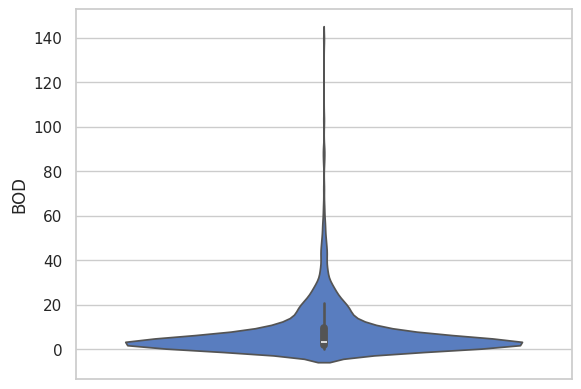

In [ ]:
violinplot("BOD")


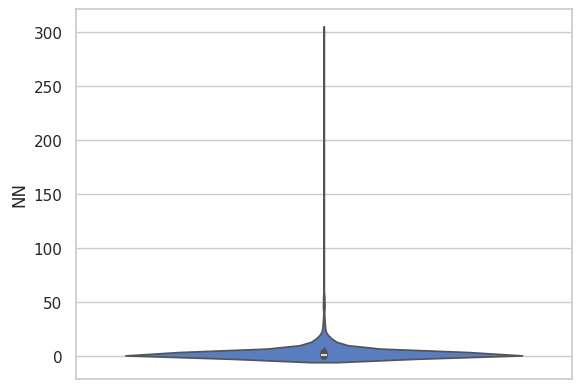

In [ ]:
violinplot("NN")


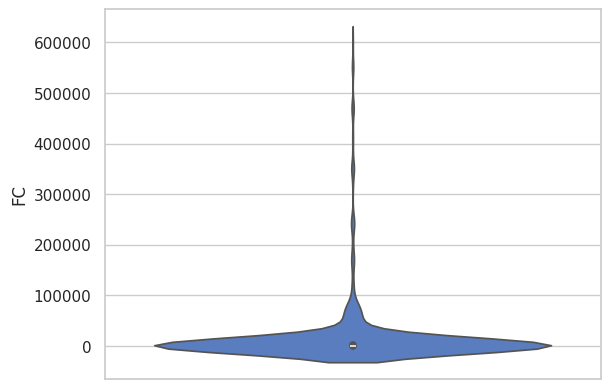

In [ ]:
violinplot("FC")


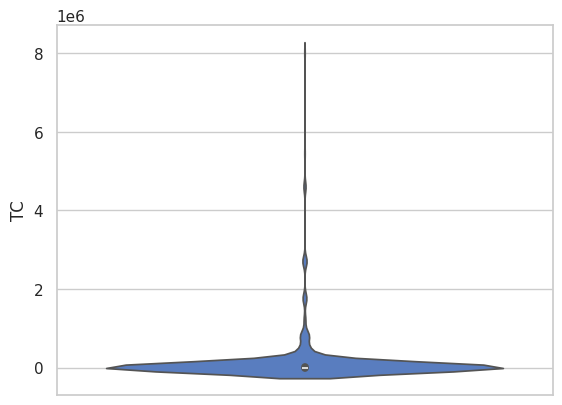

In [ ]:
violinplot("TC")


In [ ]:
counts = [0]*5
counts[0] = len(df_a[df_a["WQI"]<50])
counts[1] = len(df_a[(df_a["WQI"]>=50) & (df_a["WQI"]<100)])
counts[2] = len(df_a[(df_a["WQI"]>=100) & (df_a["WQI"]<200)])
counts[3] = len(df_a[(df_a["WQI"]>=200) & (df_a["WQI"]<300)])
counts[4] = len(df_a[df_a["WQI"]>=300])
print(counts)

[84, 455, 197, 84, 235]


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler

seed = 42
ncols = ["DO","pH","EC","BOD","NN","FC","TC"]
X,y = df_a[ncols],df_a["WQI"]
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=seed)

s = RobustScaler()
X_train_ = s.fit_transform(X_train)
X_test_ = s.transform(X_test)

sdf = pd.DataFrame(X_train_,columns=ncols)
sdf["WQI"] = pd.Series(y_train).values

sdf

,DO,pH,EC,BOD,NN,FC,TC,WQI
0,0.017167,2.166667,3.538630,2.091503,-0.453392,-0.046646,-0.056322,366.689701
1,-1.716738,0.333333,-0.348894,-0.150327,-0.157549,-0.073301,-0.108745,88.850397
2,-1.888412,-0.166667,1.272181,3.071895,3.028446,-0.043459,-0.035079,490.857390
3,-0.686695,0.500000,38.496860,-0.084967,-0.330853,0.447631,0.155907,93.487217
4,0.394850,1.250000,-0.208026,-0.215686,0.260832,-0.073301,-0.086918,68.278588
...,...,...,...,...,...,...,...,...
839,-0.738197,-0.833333,0.449358,3.202614,0.444639,20.339852,34.521803,647.245341
840,-1.596567,-0.083333,1.128583,3.333333,15.551860,-0.053600,-0.056516,524.040228
841,-0.343348,1.166667,-0.260988,-0.196078,-0.175055,-0.061423,-0.053983,76.752673
842,0.583691,0.833333,0.128856,0.202614,-0.315098,26.986238,15.803167,299.681630


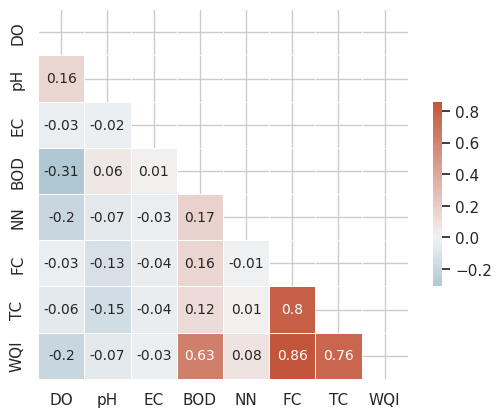

In [ ]:
cmatrix = sdf.corr(method='pearson').round(2)
mask = np.triu(np.ones_like(cmatrix, dtype=bool))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(cmatrix, mask=mask, cmap=cmap,center=0,
            square=True, linewidths=.5,cbar_kws={"shrink": .5},annot=True,annot_kws={"fontsize":10})
plt.show()

In [ ]:
selected_features = [0,3,5] # DO,BOD,FC
del_ft = [1,2,4,6]
X_train_ = np.delete(X_train_,del_ft,axis=1)
X_test_ = np.delete(X_test_,del_ft,axis=1)
print(X_train_.shape)

(844, 3)


**Training  model**

OLS

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error

reg = LinearRegression().fit(X_train_,y_train)
y_hat = reg.predict(X_test_)
print(f"RMSE: {mean_squared_error(y_test,y_hat,squared=False)}")
print(f"R2 : {r2_score(y_test,y_hat)}")

RMSE: 19.86430631776866
R2 : 0.9972224176300795


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


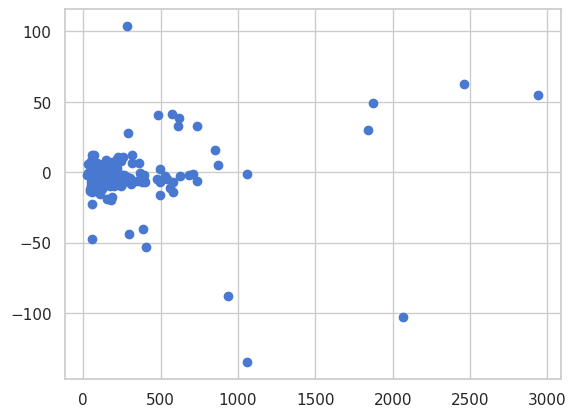

In [ ]:
residuals = y_test-y_hat
plt.scatter(y_hat,residuals)
plt.show()

In [ ]:
print(reg.coef_)


[-11.87136011 124.46713344   8.11960567]


To repurpose a regression model to classify, we use the previously mentioned WQI to WQC conversion table to convert predicted values for WQI into predicted WQC

Accuracy = 0.909952606635071


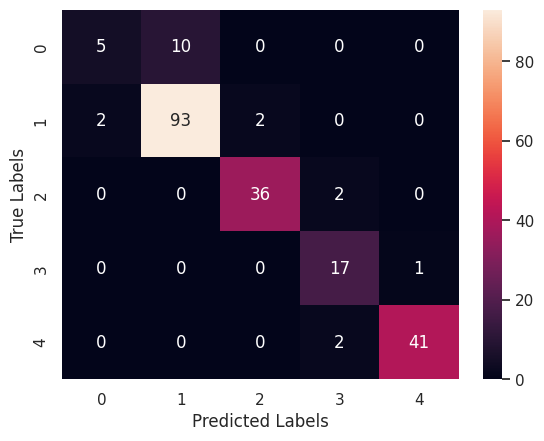

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix

# 0 = Excellent, 1 = Good, 2 = Poor, 3 = Very Poor, 4 = Unsuitable for Drinking
def classify(y):
    y_c = np.zeros_like(y,dtype=int)
    for i in range(len(y)):
        if y[i] < 50:
            y_c[i] = 0
        elif y[i] < 100:
            y_c[i] = 1
        elif y[i] < 200:
            y_c[i] = 2
        elif y[i] < 300:
            y_c[i] = 3
        else:
            y_c[i] = 4
    return y_c

#testing classification accuracy
y_c = classify(y_test.to_numpy())
y_c_hat = classify(y_hat)
print(f'Accuracy = {accuracy_score(y_c,y_c_hat)}')
cm = confusion_matrix(y_c,y_c_hat)
sns.heatmap(cm,annot=True)
plt.ylabel('True Labels')
plt.xlabel('Predicted Labels')
plt.show()

SUPPORT VECTOR REGRESSION

In [ ]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV

params = {'C':range(100,1500,100),'epsilon':np.linspace(0.05,0.25,10)}
clf = GridSearchCV(SVR(),params,n_jobs=5)
clf.fit(X_train_,y_train)
reg2 = clf.best_estimator_
y_hat2 = reg2.predict(X_test_)
print(f"RMSE: {mean_squared_error(y_test,y_hat2,squared=False)}")
print(f"R2 : {r2_score(y_test,y_hat2)}")

RMSE: 89.66779446550186
R2 : 0.9434030386354354


/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


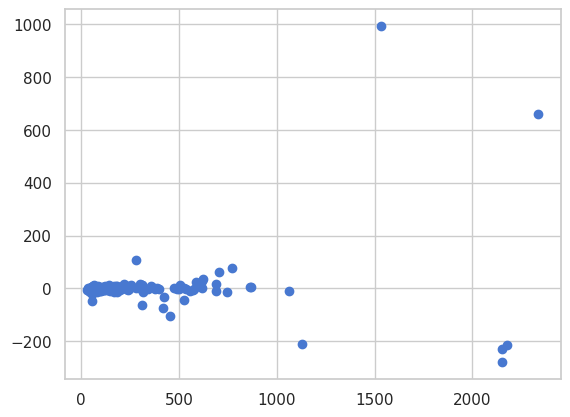

In [ ]:
residuals = y_test-y_hat2
plt.scatter(y_hat2,residuals)
plt.show()

Accuracy = 0.9146919431279621


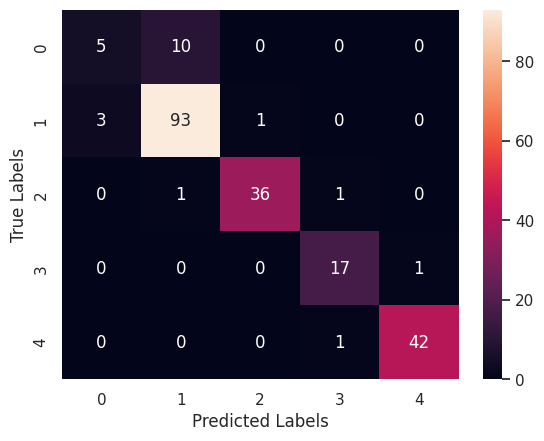

In [ ]:
y_c_hat2 = classify(y_hat2)
print(f'Accuracy = {accuracy_score(y_c,y_c_hat2)}')
cm = confusion_matrix(y_c,y_c_hat2)
sns.heatmap(cm,annot=True)
plt.ylabel('True Labels')
plt.xlabel('Predicted Labels')
plt.show()

Classification Models


Multinomial Logistic Regression


Accuracy = 0.8625592417061612


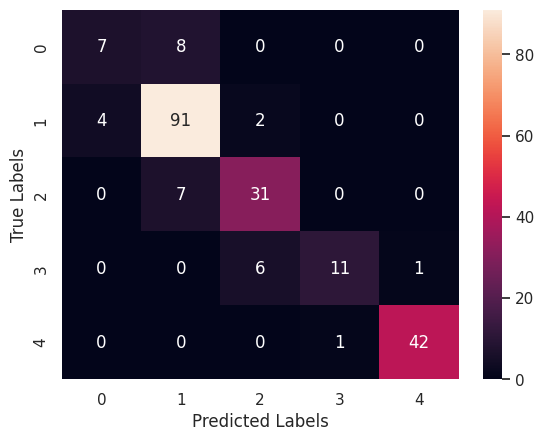

In [ ]:
from sklearn.linear_model import LogisticRegression

y_c_train = classify(y_train.to_numpy())
w = {
    0 : 3,
    1 : 1,
    2 : 1.2,
    3 : 1.2,
    4 : 1
}
clf = LogisticRegression(random_state=seed,solver='newton-cg',class_weight=w).fit(X_train_,y_c_train)
y_c_hat3 = clf.predict(X_test_)
print(f'Accuracy = {accuracy_score(y_c,y_c_hat3)}')
cm = confusion_matrix(y_c,y_c_hat3)
sns.heatmap(cm,annot=True)
plt.ylabel('True Labels')
plt.xlabel('Predicted Labels')
plt.show()

DECISION TREE

Accuracy = 0.8767772511848341


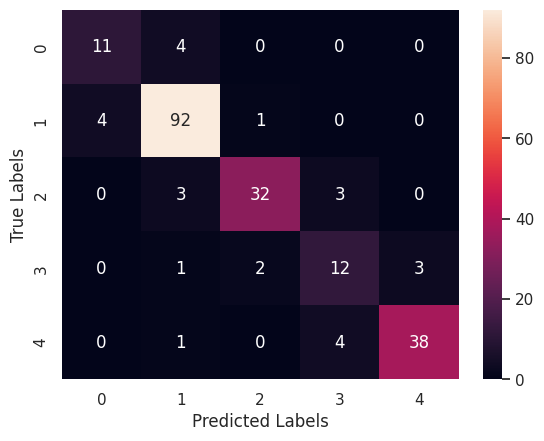

In [ ]:
from sklearn.tree import DecisionTreeClassifier

params = {'max_depth':range(3,30)}
clf = GridSearchCV(DecisionTreeClassifier(random_state=seed),params,n_jobs=5)
clf.fit(X_train_,y_c_train)
dt = clf.best_estimator_
y_c_hat4 = dt.predict(X_test_)
print(f'Accuracy = {accuracy_score(y_c,y_c_hat4)}')
cm = confusion_matrix(y_c,y_c_hat4)
sns.heatmap(cm,annot=True)
plt.ylabel('True Labels')
plt.xlabel('Predicted Labels')
plt.show()

In [ ]:
from sklearn.metrics import f1_score,cohen_kappa_score

preds = [y_c_hat,y_c_hat2,y_c_hat3,y_c_hat4]
labels = ['OLS','SVR','MLR','DT']
metrics = ['F1 Score','Kappa','Accuracy']
f1_scores = []
kappas = []
accuracies = []

for pred in preds:
    f1_scores.append(f1_score(y_c,pred,average='macro'))
    kappas.append(cohen_kappa_score(y_c,pred))
    accuracies.append(accuracy_score(y_c,pred))

d = {
    'F1 Score' : f1_scores,
    'Kappa' : kappas,
    'Accuracy' : accuracies
}
score_df = pd.DataFrame(data=d,index=labels)

score_df

,F1 Score,Kappa,Accuracy
OLS,0.833683,0.869825,0.909953
SVR,0.843164,0.876351,0.914692
MLR,0.790057,0.799554,0.862559
DT,0.818550,0.823397,0.876777


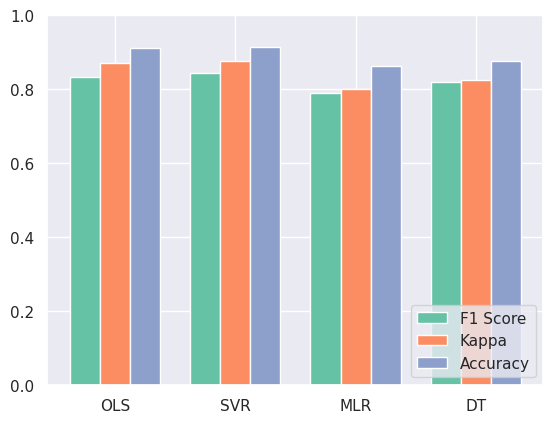

In [ ]:
sns.set_palette(sns.color_palette("Set2"))
sns.set_style('darkgrid')

x = np.arange(len(labels))
width = 0.25
multiplier = 0

fig, ax = plt.subplots()
for attr, val in d.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, val, width, label=attr)
    multiplier += 1

ax.set_xticks(x + width, labels)
ax.legend(loc='lower right')
ax.set_ylim(0, 1)

plt.show()